In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

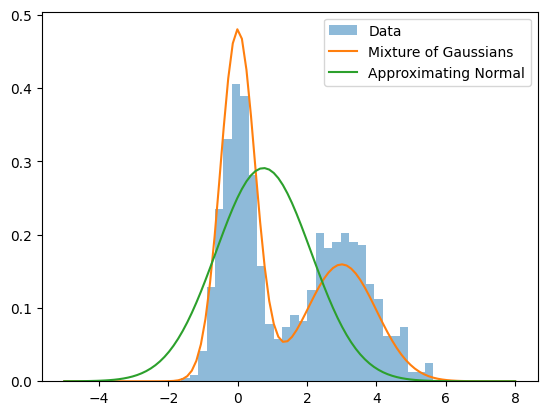

In [2]:


# Define the Mixture of Gaussians
mu1, mu2 = 0, 3
sigma1, sigma2 = 0.5, 1
pi1, pi2 = 0.6, 0.4
pdf_mix = lambda x: pi1 * norm.pdf(x, mu1, sigma1) + pi2 * norm.pdf(x, mu2, sigma2)

# Define the Normal distribution
pdf_norm = lambda x, mu, sigma: norm.pdf(x, mu, sigma)

# Define the KL-divergence between two distributions
kl_div = lambda p, q: np.sum(p * np.log(p / q))

# Define the objective function to minimize
def objective(params):
    mu, sigma = params
    pdf_approx = pdf_norm(x, mu, sigma)
    return kl_div(pdf_mix(x), pdf_approx)

# Generate some data
np.random.seed(42)
x = np.concatenate([np.random.normal(mu1, sigma1, 500), np.random.normal(mu2, sigma2, 500)])

# Find the optimal parameters of the Normal distribution
result = minimize(objective, [0, 1])
mu_hat, sigma_hat = result.x

# Plot the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(x, bins=30, density=True, alpha=0.5, label='Data')
ax.plot(np.linspace(-5, 8, 100), pdf_mix(np.linspace(-5, 8, 100)), label='Mixture of Gaussians')
ax.plot(np.linspace(-5, 8, 100), pdf_norm(np.linspace(-5, 8, 100), mu_hat, sigma_hat), label='Approximating Normal')
ax.legend()
plt.show()


In this code example, we define the Mixture of Gaussians using the parameters mu1, mu2, sigma1, sigma2, pi1, and pi2. We also define the Normal distribution using the parameters mu and sigma. The KL-divergence between two distributions is defined using the kl_div function.

Next, we define the objective function to minimize using the objective function. This function takes the parameters of the Normal distribution (mu and sigma) as input and returns the KL-divergence between the Mixture of Gaussians and the Normal distribution with those parameters. We use the minimize function from scipy.optimize to find the values of mu and sigma that minimize the objective function.

Finally, we generate some data from the Mixture of Gaussians, find the optimal values of mu and sigma, and plot the results. The resulting plot shows the original data, the Mixture of Gaussians, and the Normal distribution that best approximates the Mixture of Gaussians using KL-divergence.

Note that this code assumes that the Mixture of Gaussians has two components, but it can be easily modified to handle more components by adjusting the parameters accordingly. Also, keep in mind that KL-divergence is not symmetric, so the order in which the distributions are compared matters.